In [88]:
%reset -f

import gc
gc.collect()  # 強制 Python 回收記憶體

0

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

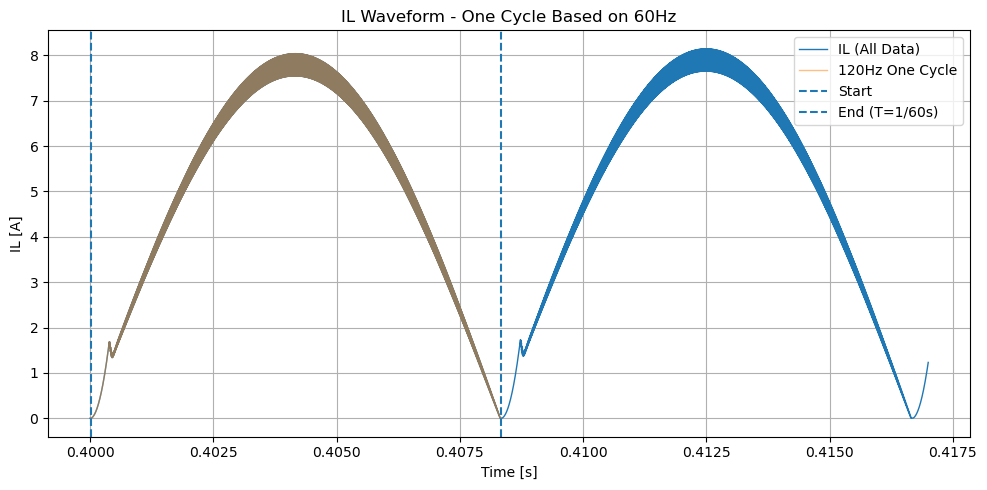

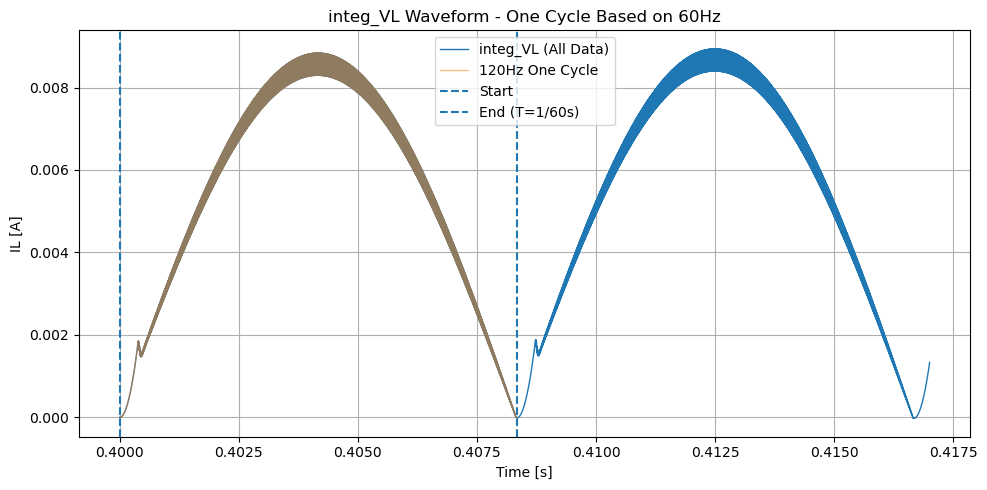

In [90]:
# 讀取 CSV
df = pd.read_csv('./Data/REF_PFC_sim.csv')

# 假設欄位名稱為 'time' 和 'IL'，依照實際情況修改
time = df['time'].to_numpy()
IL = df['IL'].to_numpy()
integ = df['integVL'].to_numpy()

# 設定目標頻率與週期長度（秒）
target_freq = 120
T = 1 / target_freq  # 0.01667 秒

# 找波峰
peak_indices, _ = find_peaks(IL)
if len(peak_indices) == 0:
    raise ValueError("找不到波峰")

# 從第一個峰值開始
start_idx = peak_indices[0]
start_time = time[start_idx]

# 找最接近 start_time + T 的 index 作為結尾
end_time = start_time + T
end_idx = np.argmin(np.abs(time - end_time))

# 擷取這段週期內的 IL 資料
cycle_IL = IL[start_idx:end_idx + 1]
cycle_time = time[start_idx:end_idx + 1]
cycle_integ = integ[start_idx:end_idx + 1]

# 繪圖
plt.figure(figsize=(10, 5))
plt.plot(time, IL, label='IL (All Data)', linewidth=1)
plt.plot(cycle_time, cycle_IL, linewidth=1, label='120Hz One Cycle', alpha=0.5)
plt.axvline(x=start_time, linestyle='--', label='Start')
plt.axvline(x=end_time, linestyle='--', label='End (T=1/60s)')

plt.title("IL Waveform - One Cycle Based on 60Hz")
plt.xlabel("Time [s]")
plt.ylabel("IL [A]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(time, integ, label='integ_VL (All Data)', linewidth=1)
plt.plot(cycle_time,
         cycle_integ,
         linewidth=1,
         label='120Hz One Cycle',
         alpha=0.5)
plt.axvline(x=start_time, linestyle='--', label='Start')
plt.axvline(x=end_time, linestyle='--', label='End (T=1/60s)')

plt.title("integ_VL Waveform - One Cycle Based on 60Hz")
plt.xlabel("Time [s]")
plt.ylabel("IL [A]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
# 組成 DataFrame
df_cycle = pd.DataFrame({
    'time': cycle_time,
    'IL': cycle_IL,
    'integVL': cycle_integ
})

# 儲存為 CSV
df_cycle.to_csv('./Data/REF_PFC_sim_one_cycle.csv', index=False)
print("已儲存為 IL_120Hz_cycle.csv")

已儲存為 IL_120Hz_cycle.csv
